In [1]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sn
import matplotlib.pyplot as plt
from tqdm import tqdm

from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Bidirectional
from sklearn.metrics import accuracy_score, f1_score
from sklearn.preprocessing import LabelEncoder
# from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split


print(tf.__version__)
# print(keras.__version__)

2022-12-08 14:31:30.768159: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-12-08 14:31:30.768186: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


2.5.0


In [18]:
    path = './YunlinYilan'
    fileset = sorted( [f for f in os.listdir(path) if f.endswith('.npy')])
    filedic = {}
    features = labels = np.array([])
    
    for idx, i in enumerate(fileset):
        if idx %2==0:
            filedic[i]= fileset[idx+1]
    print(filedic)

{'Yilan-imd1-X-mfcc-augmented.npy': 'Yilan-imd1-y-mfcc-augmented.npy', 'Yilan-imd3-X-mfcc-augmented.npy': 'Yilan-imd3-y-mfcc-augmented.npy', 'Yilan-q2-X-mfcc-augmented.npy': 'Yilan-q2-y-mfcc-augmented.npy', 'Yilan-q3-X-mfcc-augmented.npy': 'Yilan-q3-y-mfcc-augmented.npy', 'Yilan-queenless-1-X-mfcc-augmented.npy': 'Yilan-queenless-1-y-mfcc-augmented.npy', 'Yunlin-imd-3-X-mfcc-augmented.npy': 'Yunlin-imd-3-y-mfcc-augmented.npy', 'Yunlin-imd-4-X-mfcc-augmented.npy': 'Yunlin-imd-4-y-mfcc-augmented.npy', 'Yunlin-queenless-1-X-mfcc-augmented.npy': 'Yunlin-queenless-1-y-mfcc-augmented.npy', 'Yunlin-queenless-2-X-mfcc-augmented.npy': 'Yunlin-queenless-2-y-mfcc-augmented.npy', 'Yunlin-queenless-4-X-mfcc-augmented.npy': 'Yunlin-queenless-4-y-mfcc-augmented.npy', 'yunlin-dwv1-X-mfcc-augmented.npy': 'yunlin-dwv1-y-mfcc-augmented.npy'}


In [19]:
def concat_dataset():
    path = './YunlinYilan'
    fileset = sorted( [f for f in os.listdir(path) if f.endswith('.npy')])
    filedic = {}
    features = labels = np.array([])
    
    for idx, i in enumerate(fileset):
        if idx %2==0:
            filedic[i]= fileset[idx+1]
    
    
    for file in filedic.keys():
                
            features_filename = file
            labels_filename = filedic[file]
            
            curr_features = np.load(os.path.join(path, features_filename))
            curr_labels = np.load(os.path.join(path, labels_filename))
            
            if features.size == 0:
                features = curr_features
            else:
                features = np.concatenate((features, curr_features))
                
            
            if labels.size == 0:
                labels = curr_labels
            else:
                labels = np.concatenate((labels, curr_labels))
    
    return (features, labels)

        
dataset = concat_dataset()
print(dataset[0])
print(dataset[1])

[[[-1.00000000e+00 -1.00000000e+00 -1.00000000e+00 ... -1.00000000e+00
   -1.00000000e+00 -1.00000000e+00]
  [ 3.22595239e-01  3.31384689e-01  3.30903828e-01 ...  3.41433287e-01
    3.36080402e-01  3.26471508e-01]
  [ 1.35565981e-01  1.36333808e-01  1.41218573e-01 ...  1.38799071e-01
    1.33996978e-01  1.32893905e-01]
  ...
  [-1.18017122e-02 -9.57990531e-03 -1.12683345e-02 ... -1.52930189e-02
   -9.21510532e-03 -5.76512795e-03]
  [ 1.13164494e-03  7.44608522e-04 -7.93286692e-03 ... -9.64291766e-03
    1.66367146e-03  1.21046007e-02]
  [-9.91005078e-03 -7.72289699e-04  3.18092061e-03 ...  1.78289367e-03
    7.66988983e-03  1.35102542e-02]]

 [[-1.00000000e+00 -1.00000000e+00 -1.00000000e+00 ... -1.00000000e+00
   -1.00000000e+00 -1.00000000e+00]
  [ 3.02903086e-01  3.12542439e-01  3.21480513e-01 ...  3.27982157e-01
    3.22050333e-01  3.18779498e-01]
  [ 1.41100049e-01  1.48126677e-01  1.40183643e-01 ...  1.42378688e-01
    1.45236403e-01  1.49957255e-01]
  ...
  [-9.38020460e-03 -8.4

In [20]:
features = dataset[0]

le = LabelEncoder()
labels = le.fit_transform(dataset[1])
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)
print(features.shape, labels.shape)

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

{'Normal': 0, 'Poision': 1, 'imd': 2, 'normal': 3, 'queenless': 4}
(5859, 40, 2401) (5859,)


In [26]:
model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(40, 2401)))
model.add(Dense(8, activation='relu'))
model.add(LSTM(64))
model.add(Dropout(0.2))
model.add(Dense(5, activation='softmax'))
# with tf.device('/physical_device:GPU:0'):
model.compile(loss='SparseCategoricalCrossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
                   
history = model.fit(X_train, y_train, epochs=30, batch_size=20, verbose=1)

2022-12-08 15:55:26.716450: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 1800557920 exceeds 10% of free system memory.


Epoch 1/30
235/235 [==============================] - 4s 13ms/step - loss: 1.3888 - accuracy: 0.3727
Epoch 2/30
235/235 [==============================] - 3s 13ms/step - loss: 0.9557 - accuracy: 0.5971
Epoch 3/30
235/235 [==============================] - 3s 13ms/step - loss: 0.7897 - accuracy: 0.6601
Epoch 4/30
235/235 [==============================] - 3s 13ms/step - loss: 0.6493 - accuracy: 0.7250
Epoch 5/30
235/235 [==============================] - 3s 13ms/step - loss: 0.5453 - accuracy: 0.7691
Epoch 6/30
235/235 [==============================] - 3s 13ms/step - loss: 0.4578 - accuracy: 0.8202
Epoch 7/30
235/235 [==============================] - 3s 13ms/step - loss: 0.4035 - accuracy: 0.8471
Epoch 8/30
235/235 [==============================] - 3s 13ms/step - loss: 0.3557 - accuracy: 0.8681
Epoch 9/30
235/235 [==============================] - 3s 13ms/step - loss: 0.2943 - accuracy: 0.8934
Epoch 10/30
235/235 [==============================] - 3s 13ms/step - loss: 0.2679 - accura

In [1]:
model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(40, 2401)))
model.add(Dense(8, activation='relu'))
model.add(Bidirectional(LSTM(20, return_sequences=True)))
model.add(Bidirectional(LSTM(16)))
#model.add(LSTM(64))
model.add(Dropout(0.2))
model.add(Dense(4, activation='softmax'))

# with tf.device('/physical_device:GPU:0'):
model.compile(loss='SparseCategoricalCrossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
                   
history = model.fit(X_train, y_train, epochs=30, batch_size=80, verbose=1)

NameError: name 'Sequential' is not defined

In [27]:
print("Evaluate on test data")
results = model.evaluate(X_test, y_test)#, batch_size=128
print("test loss, test acc:", results)

Evaluate on test data
37/37 [==============================] - 1s 6ms/step - loss: 0.0853 - accuracy: 0.9744
test loss, test acc: [0.08526543527841568, 0.9744027256965637]


In [28]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
y_pred = np.argmax(model.predict(X_test), axis=1)
cm_array = tf.math.confusion_matrix(y_test, y_pred)
cm_array
#df_cm = pd.DataFrame(cm_array, range(4), range(4))
#sn.set(font_scale=1.4) # for label size
#sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size
#plt.show()


<tf.Tensor: shape=(5, 5), dtype=int32, numpy=
array([[191,   2,   0,   0,   0],
       [  2, 192,   0,   2,   0],
       [  0,   0, 234,   2,   0],
       [  0,   1,   6, 282,  10],
       [  0,   0,   4,   1, 243]], dtype=int32)>

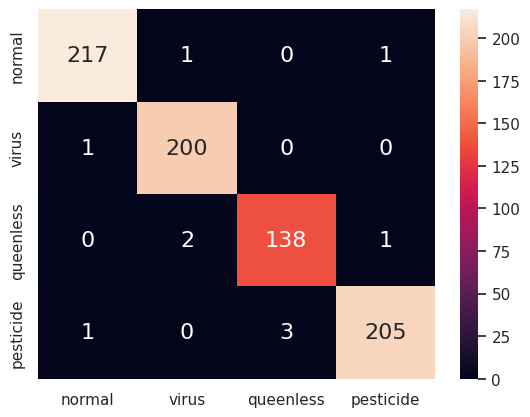

In [29]:
array =[[217,   1,  0,   1],
       [  1, 200,  0,   0],
       [ 0,   2, 138,   1],
       [  1,   0,   3, 205]]
class_names = ['normal', 'virus','queenless','pesticide']
df_cm = pd.DataFrame(array,class_names,class_names)
sn.set(font_scale=1.0) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16},fmt='.20g') # font size
plt.show()

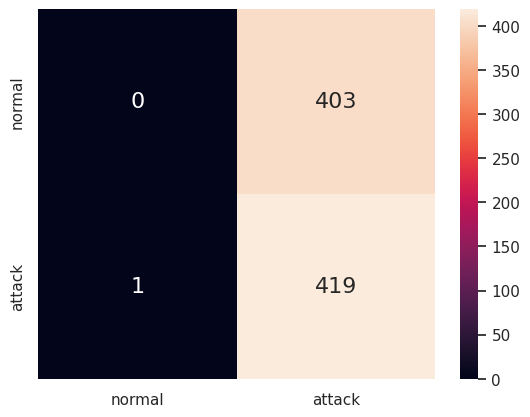

In [21]:
array =[[0,   403],
       [  1, 419 ]]
class_names = ['normal', 'attack']
df_cm = pd.DataFrame(array,class_names,class_names)
sn.set(font_scale=1.0) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16},fmt='.20g') # font size
plt.show()

In [18]:
model.save('./model/multiclass_model_yunlinyilan.h5')